In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [4]:
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn
from modules import matplotlib_utils
matplotlib_utils.set_default_configs(plt, seaborn)
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
def binary_entropy(p):
    return -p * np.log2(p) - (1-p) * np.log2(1-p)

def entropy(p):
    return np.sum(-p * np.log2(p))

def find_smallest_prob(p, mutual_info=0):
    p = np.maximum(p, 1e-12)
    p = p / np.sum(p)
    label_ent = entropy(p)
    assert 0 <= mutual_info <= label_ent
    denom = np.log2(len(p) - 1)
    grid = np.linspace(0.001, 0.999, 1000)
    ans = None
    for x in grid[::-1]:
        if x >= (label_ent - mutual_info - binary_entropy(x)) / denom:
            ans = x
    return ans

def uniform_noise(r, num_classes=10):
    p = np.ones(num_classes) * r / (num_classes - 1)
    p[0] = 1 - r
    assert np.isclose(np.sum(p), 1.0)
    return p

def pair_noise(r, num_classes=10):
    p = np.zeros(num_classes)
    p[0] = 1 - r
    p[1] = r
    assert np.isclose(np.sum(p), 1.0)
    return p

def triple_noise(r, num_classes=10):
    p = np.zeros(num_classes)
    p[0] = 1 - r
    p[1] = r/2.0
    p[2] = r/2.0
    assert np.isclose(np.sum(p), 1.0)
    return p

In [7]:
print("Fano's result for 0.8 uniform noise: {:.3f}".format(find_smallest_prob(uniform_noise(0.8))))
print("Fano's result for 0.4 pair noise: {:.3f}".format(find_smallest_prob(pair_noise(0.4))))
print("Fano's result for 0.4 pair noise: {:.3f}".format(find_smallest_prob(triple_noise(0.4))))
print("Fano's result for 0.4 pair noise: {:.3f}".format(find_smallest_prob(triple_noise(0.4, num_classes=4))))
print("Fano's result for 0.8 uniform noise and mi=1: {:.3f}".format(find_smallest_prob(uniform_noise(0.8), mutual_info=1.0)))

Fano's result for 0.8 uniform noise: 0.800
Fano's result for 0.4 pair noise: 0.131
Fano's result for 0.4 pair noise: 0.204
Fano's result for 0.4 pair noise: 0.306
Fano's result for 0.8 uniform noise and mi=1: 0.406


<IPython.core.display.Javascript object>


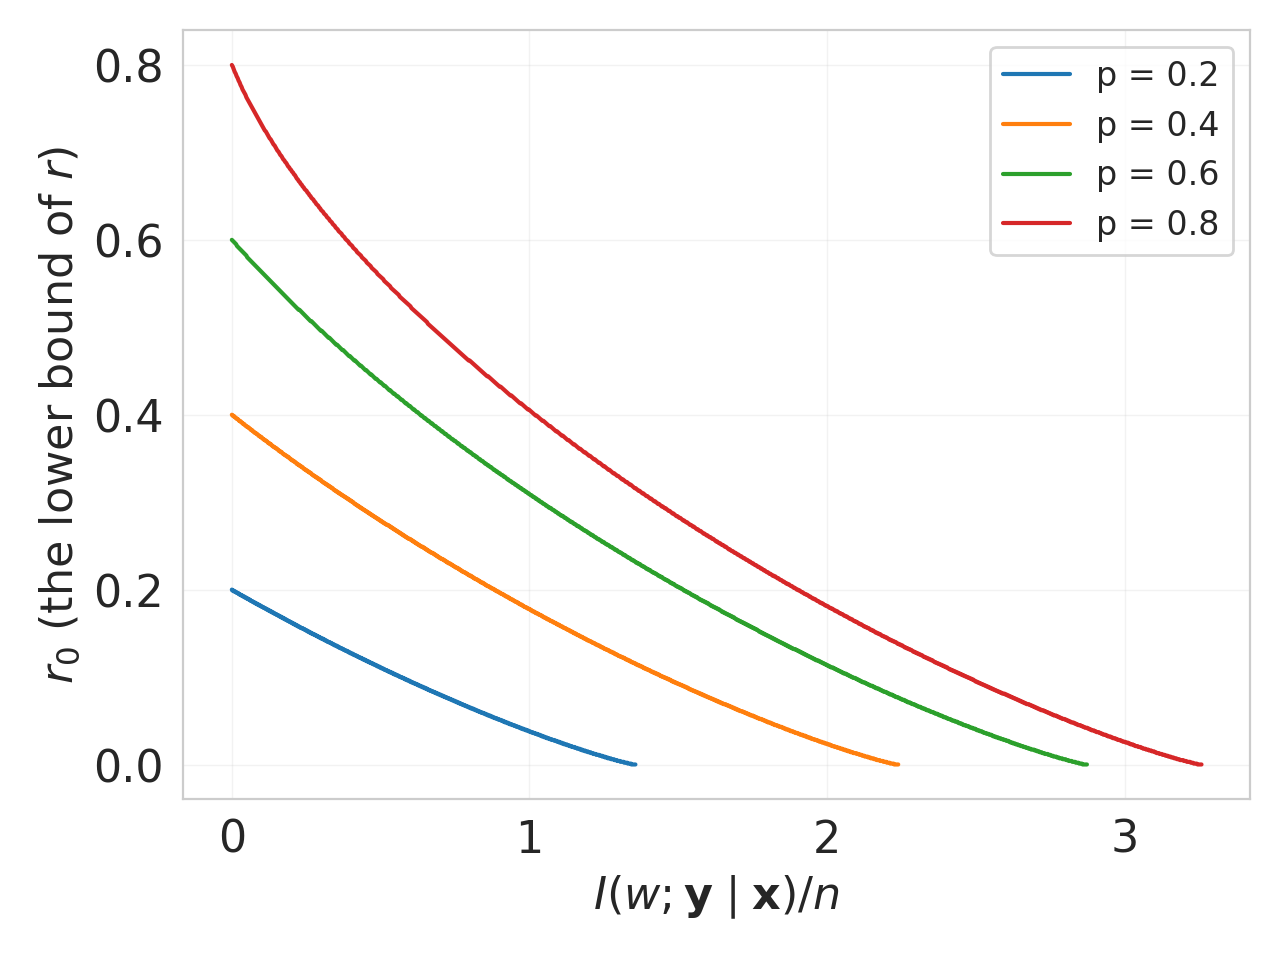

100%|██████████| 1000/1000 [00:04<00:00, 210.81it/s]


In [9]:
# Trying to plot for uniform noise with different values of I(w : y | x)
fig, ax = plt.subplots(1)
rs = [0.2, 0.4, 0.6, 0.8]

for r in rs:
    p = uniform_noise(r=r, num_classes=10)
    mi_values = np.linspace(0.0, entropy(p), 1000)
    bounds = [find_smallest_prob(p=p, mutual_info=mi) for mi in tqdm(mi_values)]
    ax.plot(mi_values, bounds, label=f'p = {r}')
# plt.title("Uniform noise with rate $p$")
plt.xlabel("$I(w; \\mathbf{y} \\mid \\mathbf{x}) / n$")
plt.ylabel("$r_0$ (the lower bound of $r$)")
plt.legend()
plt.tight_layout()
plt.savefig('plots/fano-uniform.pdf')